# Prostate Image Segmentation using AI

# Rashmi S

# 21BDA02

In [2]:
import tensorflow as tf
import os
import time
import glob
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
import datetime
import sys
sys.path.append('../')
from utils import *
#from utils import get_imgs_labels_paths, read_imgs_labels
#from utils import create_train_test_dataset, show_img

In [3]:
dataset_path = 'D:/Down/Dataset'
checkpoint_dir = './training_checkpoints'
log_dir = "./logs/"

num_classes = 5
resize_shape = (384 , 384)# to resize the size of the images
input_shape = (256, 256) # network input
number_test_image = 50 # number of test images 

buffer_size = 400
batch_size = 1
Lambda = 100
epochs = 100

In [4]:
dataset_paths = get_imgs_labels_paths(dataset_path)
x_train, y_train = read_imgs_labels(dataset_paths, resize_shape, num_classes)

In [8]:
#print(dataset_paths)

In [9]:
x_train.shape,y_train.shape

((719, 384, 384, 3), (719, 384, 384, 5))

In [10]:
train_dataset, test_dataset = create_train_test_dataset(x_train, y_train, number_test_image,
                                                        buffer_size, batch_size, input_shape)

#### Basic EDA

In [16]:
len(train_dataset)

669

In [17]:
len(test_dataset)

50

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,1.0
Unique numbers in channel 4 are 0.0,1.0


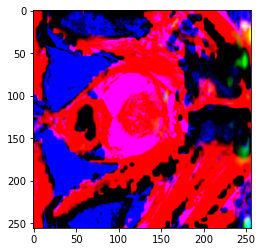

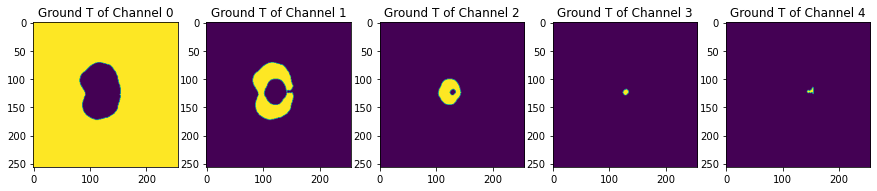

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,1.0


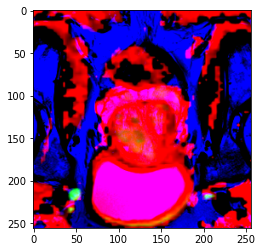

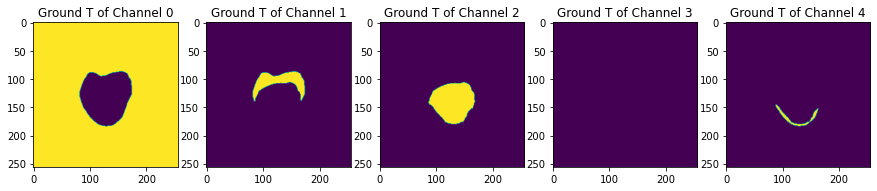

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,1.0


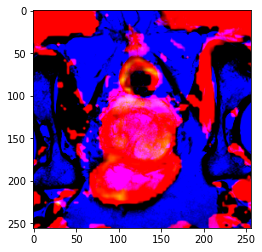

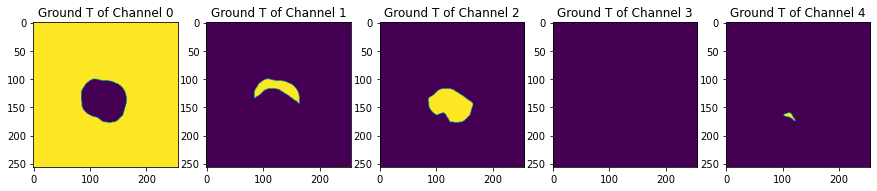

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,1.0
Unique numbers in channel 4 are 0.0,0.0


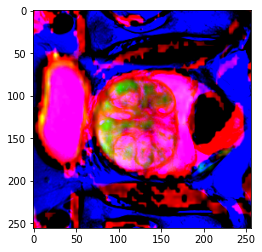

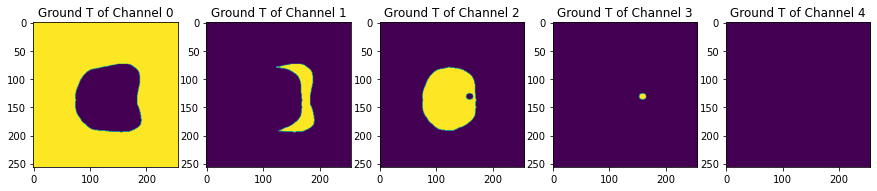

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,0.0


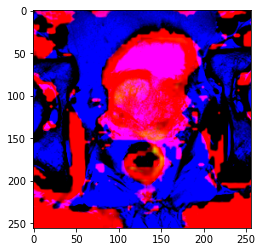

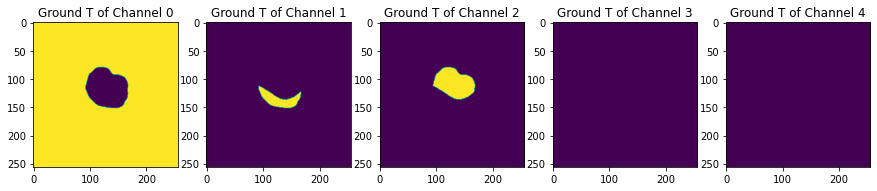

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,1.0
Unique numbers in channel 4 are 0.0,0.0


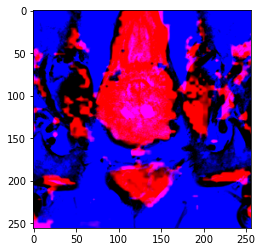

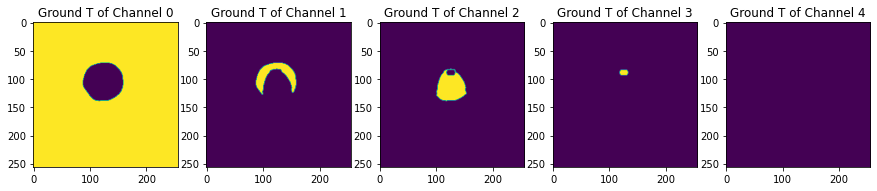

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 1.0,1.0
Unique numbers in channel 1 are 0.0,0.0
Unique numbers in channel 2 are 0.0,0.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,0.0


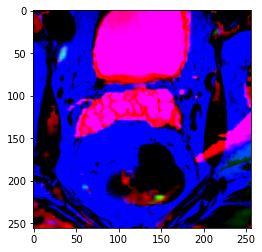

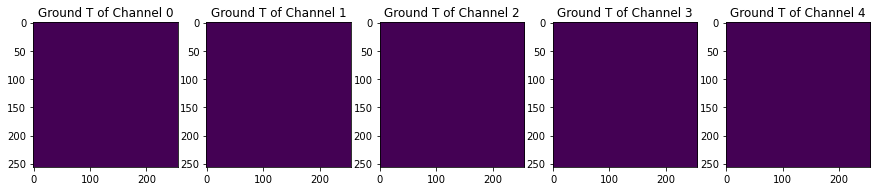

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,0.0
Unique numbers in channel 2 are 0.0,0.0
Unique numbers in channel 3 are 0.0,1.0
Unique numbers in channel 4 are 0.0,0.0


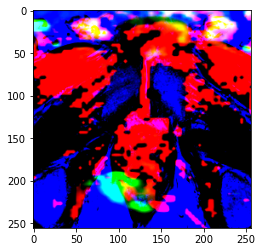

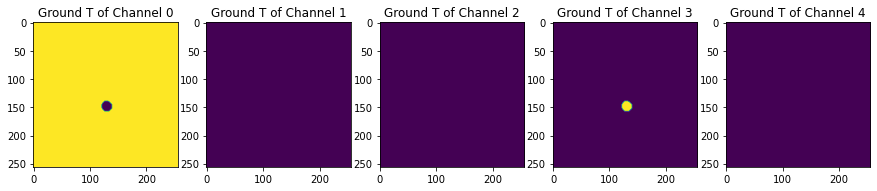

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,1.0


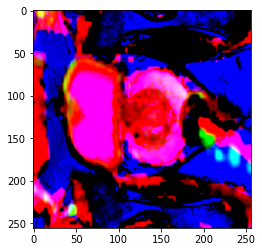

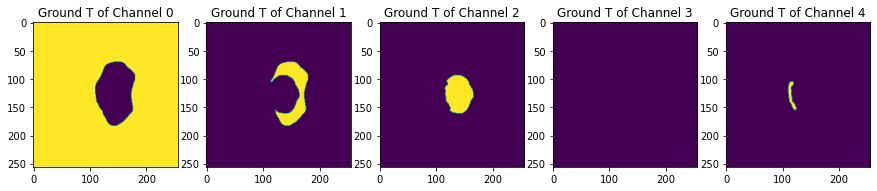

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,0.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,0.0


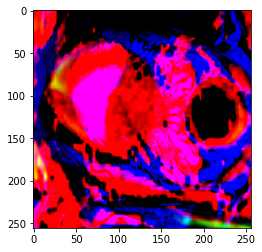

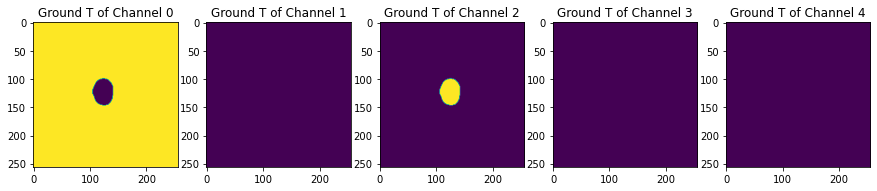

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,1.0
Unique numbers in channel 4 are 0.0,0.0


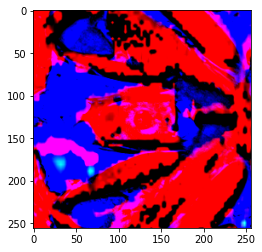

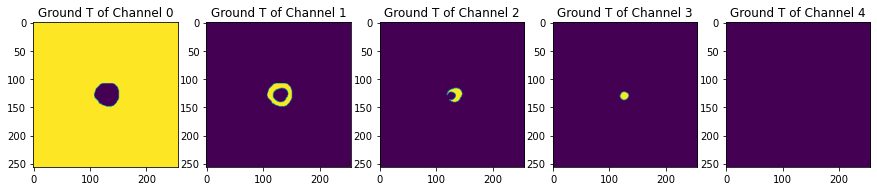

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,1.0
Unique numbers in channel 4 are 0.0,0.0


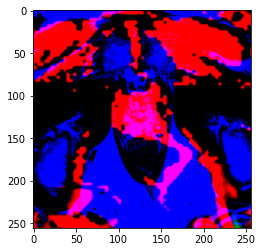

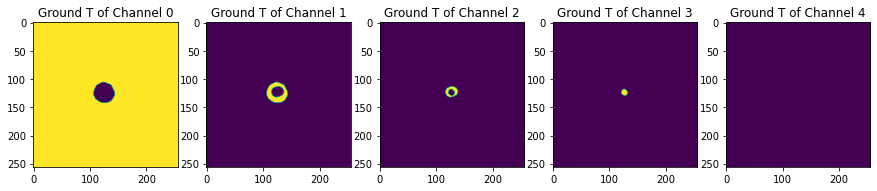

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 1.0,1.0
Unique numbers in channel 1 are 0.0,0.0
Unique numbers in channel 2 are 0.0,0.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,0.0


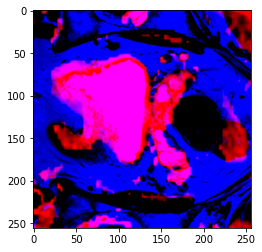

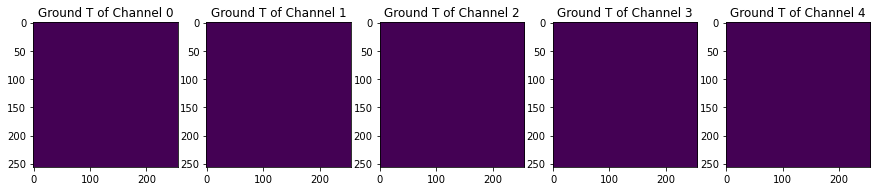

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,1.0
Unique numbers in channel 4 are 0.0,0.0


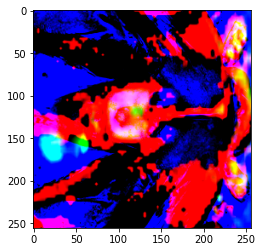

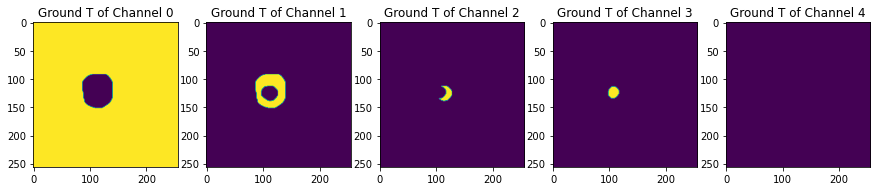

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,1.0


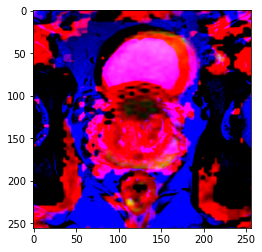

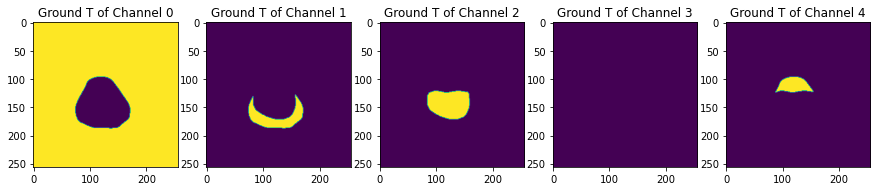

In [15]:

for example_input, example_target in train_dataset.take(15):
    print(example_input.shape, example_target.shape)

    show_img(example_input, example_target, 5)


#### Balancing the dataset

In [40]:
def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(
               tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
               kernel_initializer=initializer, use_bias=False)
               )

    if apply_batchnorm:
        result.add(tf.keras.layers.BatchNormalization())

    result.add(tf.keras.layers.LeakyReLU())

    return result

In [41]:
def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(
               tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
               padding='same',
               kernel_initializer=initializer,
               use_bias=False)
               )

    result.add(tf.keras.layers.BatchNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

    result.add(tf.keras.layers.ReLU())

    return result

In [42]:
def Generator():
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])

    down_stack = [
                    downsample(64, 4, apply_batchnorm=False),  # (bs, 128, 128, 64)
                    downsample(128, 4),  # (bs, 64, 64, 128)
                    downsample(256, 4),  # (bs, 32, 32, 256)
                    downsample(512, 4),  # (bs, 16, 16, 512)
                    downsample(512, 4),  # (bs, 8, 8, 512)
                    downsample(512, 4),  # (bs, 4, 4, 512)
                    downsample(512, 4),  # (bs, 2, 2, 512)
                    downsample(512, 4),  # (bs, 1, 1, 512)
                  ]

    up_stack = [
                    upsample(512, 4, apply_dropout=True),  # (bs, 2, 2, 1024)
                    upsample(512, 4, apply_dropout=True),  # (bs, 4, 4, 1024)
                    upsample(512, 4, apply_dropout=True),  # (bs, 8, 8, 1024)
                    upsample(512, 4),  # (bs, 16, 16, 1024)
                    upsample(256, 4),  # (bs, 32, 32, 512)
                    upsample(128, 4),  # (bs, 64, 64, 256)
                    upsample(64, 4),  # (bs, 128, 128, 128)
                ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(num_classes, 4,
                                           strides=2,
                                           padding='same',
                                           kernel_initializer=initializer,
                                           activation='sigmoid')  # (bs, 256, 256, OUTPUT_CHANNELS)

    x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])

    x = last(x)
    return tf.keras.Model(inputs=inputs, outputs=x)

In [43]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


(1, 256, 256, 5)


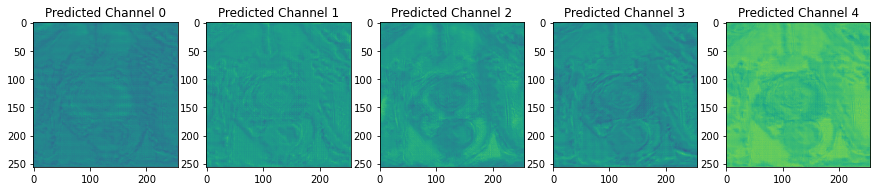

In [44]:
gen_output = generator(example_input, training=False)
fig, axs = plt.subplots(1, num_classes, figsize=(15, 6), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(num_classes):
        axs[i].imshow(gen_output[0,:,:,i])
        axs[i].set_title('Predicted Channel ' + str(i))
print(gen_output.shape)

In [45]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [46]:
def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

    # mean absolute error
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

    total_gen_loss = gan_loss + (Lambda * l1_loss)

    return total_gen_loss, gan_loss, l1_loss

In [47]:
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)

    inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
    tar = tf.keras.layers.Input(shape=[256, 256, num_classes], name='target_image')

    x = tf.keras.layers.concatenate([inp, tar])  # (bs, 256, 256, OUTPUT_CHANNELS + 3)

    down1 = downsample(64, 4, False)(x)  # (bs, 128, 128, 64)
    down2 = downsample(128, 4)(down1)  # (bs, 64, 64, 128)
    down3 = downsample(256, 4)(down2)  # (bs, 32, 32, 256)

    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (bs, 34, 34, 256)
    conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (bs, 31, 31, 512)

    batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

    leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (bs, 33, 33, 512)

    last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (bs, 30, 30, 1)

    return tf.keras.Model(inputs=[inp, tar], outputs=last)

In [48]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


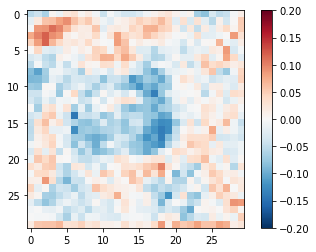

In [49]:
disc_out = discriminator([example_input, gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-.2, vmax=.2, cmap='RdBu_r')
plt.colorbar()

In [50]:
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss

In [51]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [52]:
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [53]:
def generate_images(model, test_input, tar):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(4, 4))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'GroundT of Channel ', 'Predicted Channel ']

    plt.imshow(display_list[0])
    fig, axs = plt.subplots(1,num_classes, figsize=(15, 6), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    for i in range(num_classes):
        axs[i].imshow(display_list[1][:,:,i])
        axs[i].set_title(title[1] + str(i))
        
    fig, axs = plt.subplots(1,num_classes, figsize=(15, 6), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    for i in range(num_classes):
        axs[i].imshow(display_list[2][:,:,i])
        axs[i].set_title(title[2] + str(i))
    plt.show()
    print()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


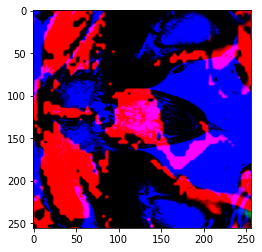

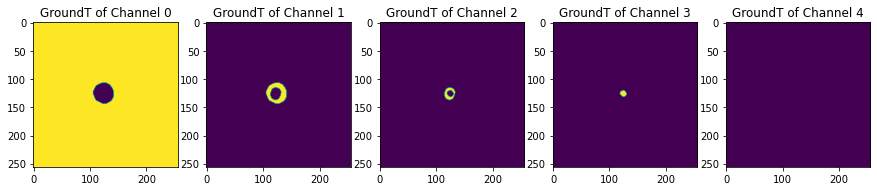

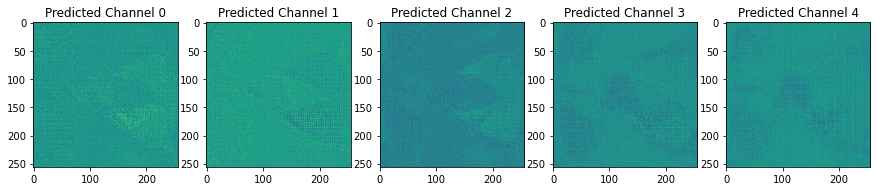

In [54]:
for example_input, example_target in train_dataset.take(1):
    generate_images(generator, example_input, example_target)

In [55]:
summary_writer = tf.summary.create_file_writer(
                                                log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
                                               )

In [56]:
@tf.function
def train_step(input_image, target, epoch):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)

        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

    with summary_writer.as_default():
        tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=epoch)
        tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=epoch)
        tf.summary.scalar('disc_loss', disc_loss, step=epoch)

In [57]:
def fit(train_ds, epochs, test_ds):
    for epoch in range(epochs):
        start = time.time()

        display.clear_output(wait=True)

        for example_input, example_target in test_ds.take(1):
            generate_images(generator, example_input, example_target)
            time.sleep(5)
        print("Epoch: ", epoch)

        # Train
        for n, (input_image, target) in train_ds.enumerate():
            train_step(input_image, target, epoch)
            print('.', end='')

        print()

        # saving (checkpoint) the model every 10 epochs
        if (epoch + 1) % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                        time.time()-start))
    checkpoint.save(file_prefix=checkpoint_prefix)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


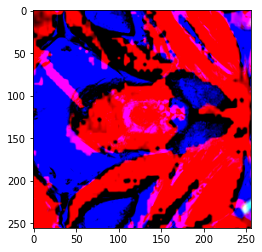

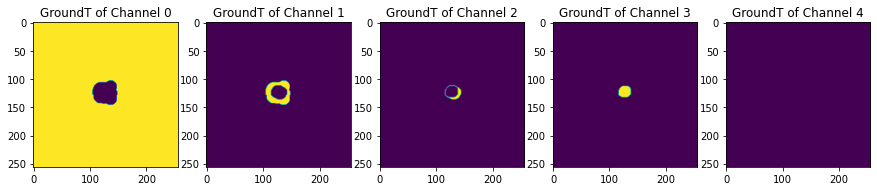

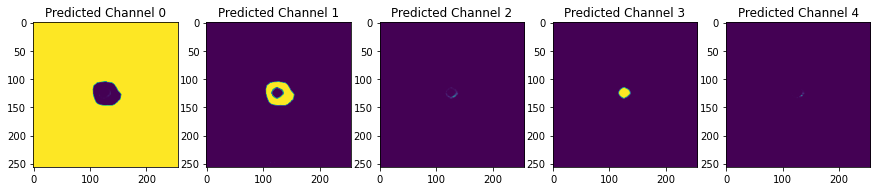


Epoch:  120
........................

KeyboardInterrupt: 

In [58]:
fit(train_dataset, 120, train_dataset)

#### NOTE - The training was stopped after 120 epochs

### Saving the model

In [59]:
filename="prostate"
generator.save(filename)

INFO:tensorflow:Assets written to: prostate1\assets


In [60]:
from tensorflow.keras.models import load_model
a=load_model(filename)

In [61]:
%reload_ext tensorboard
%tensorboard --logdir {log_dir} --port=16007

In [62]:

checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

### Testing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


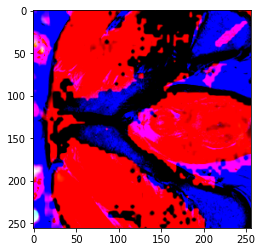

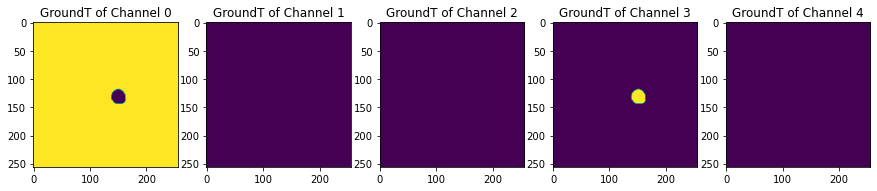

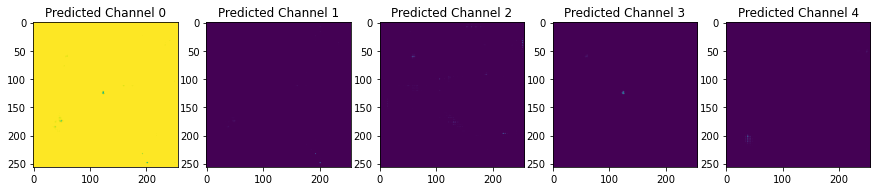

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


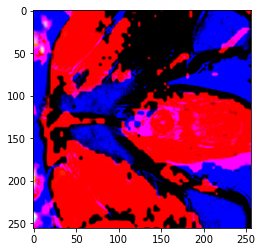

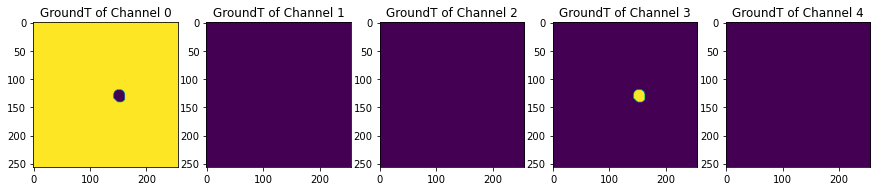

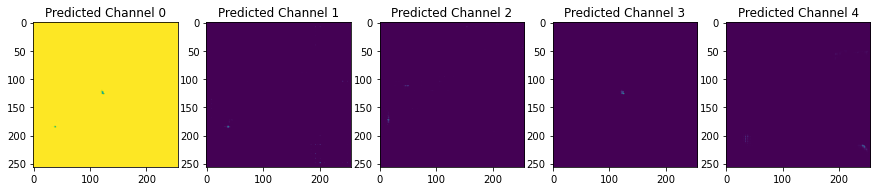

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


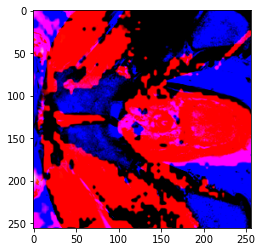

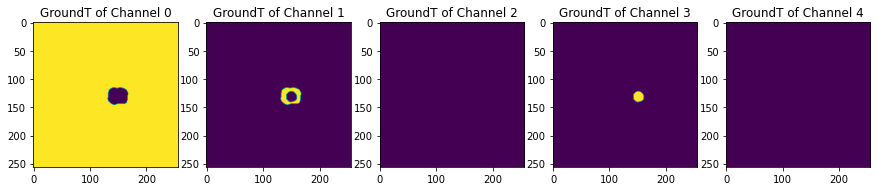

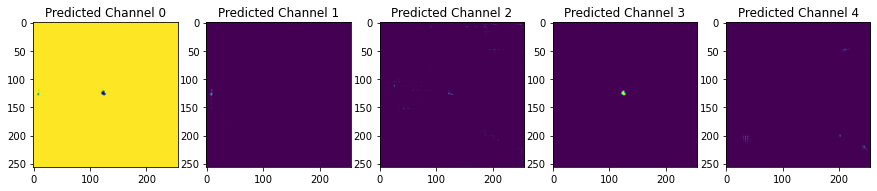

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


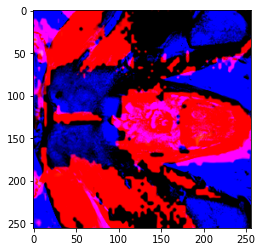

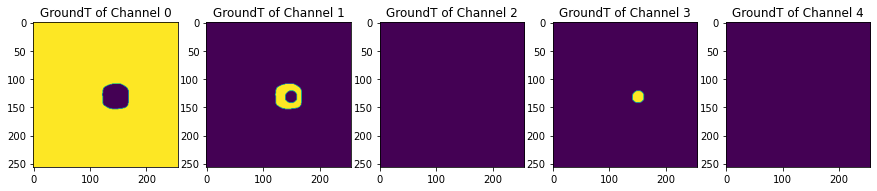

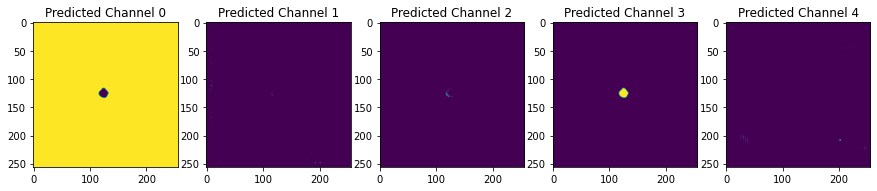

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


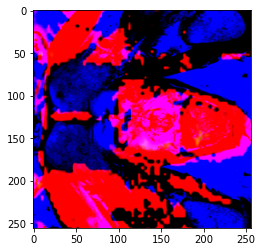

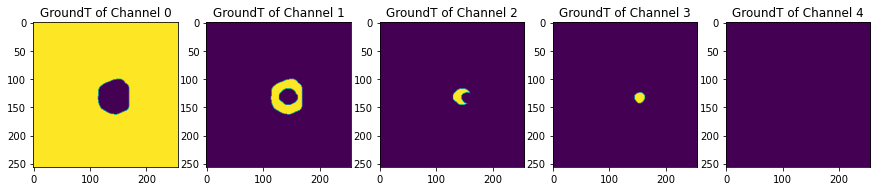

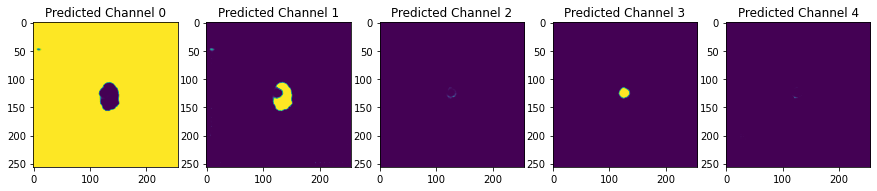

In [63]:
for example_input, example_target in test_dataset.take(5):
    generate_images(generator, example_input, example_target)

## Further Improvements :-

1. The accuracy of the predicted images could be improved
2. Training the images with more data could be the next ideal move
3. Increasing the Epochs while training will definetly deliver much accurate results.
